<a href="https://colab.research.google.com/github/haron1100/MLSummerSchool/blob/master/Session_4_The_Machine_Learning_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('/content/gdrive/My Drive/data/AutoInsurSweden.csv')

In [ ]:
print(df.head())

   number_of_claims  total_payment(thousands of Swedish Kronor)
0               108                                       392.5
1                19                                         5.2
2                13                                        15.7
3               124                                       422.2
4                40                                       119.4


In [ ]:
x = np.array(df['number_of_claims'])
y = np.array(df[df.columns[1]])

In [ ]:
def predict(x):
    return 3.7*x##prediction for y

In [ ]:
#mean squared error
#mse =  1/n * sum_from_0_to_n( (y_i-y_pred_i)^2 )
def mse_cost(y, y_pred):
    diffs = y-y_pred
    squared_diffs = np.square(diffs)
    mean_squared_diff = np.mean(squared_diffs)
    return mean_squared_diff

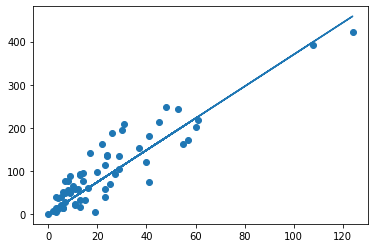

In [ ]:
y_pred = predict(x)
plt.scatter(x, y)
plt.plot(x, y_pred)
## plot y against x
## use the predict function to y_pred, then plot y_pred against x - on the above plot so you can compare the y against y_pred

In [ ]:
print(mse_cost(y, y_pred))

1533.3684126984126


In [ ]:
def random_search(n_iterations): #an optimiser
    lowest_cost = float("inf") #lowest cost ive seen thus far
    for i in range(n_iterations):#in a loop, until we do n_iterations
        m = np.random.randn()*5 #randomly sample values for m
        b = np.random.randn()*5 #randomly sample values for b
        y_pred = m*x + b #make a prediction using m and b #equation for a straight line
        cost = mse_cost(y, y_pred) #calculate the cost of that prediction
        if cost<lowest_cost: #if its the lowest cost we have achieved thus far
            best_m = m #store the values for this m in a a variable
            best_b = b #store the values for this b in a a variable
            lowest_cost = cost #set the lowest cost to this new lowest cost
    return best_m, best_b #return best m and b values    

found parameters m: 3.537607620780629 b: 10.972336542198871
cost 1365.558911002206


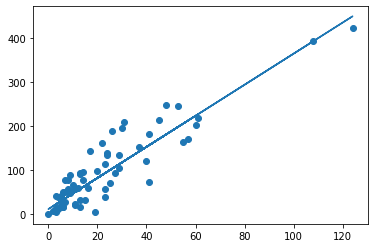

In [ ]:
m, b = random_search(1000)
y_pred = m*x+b
cost = mse_cost(y, y_pred)
print('found parameters m:',m , 'b:', b)
print('cost', cost)
plt.scatter(x, y)
plt.plot(x, y_pred)